In [214]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

pd.options.mode.chained_assignment = None

In [215]:
exchange_rates = pd.read_csv("euro-daily-hist_1999_2020.csv")

In [216]:
exchange_rates

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975


In [217]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

In [218]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [219]:
euro_to_dollar = exchange_rates.loc[:, ["Time", "US_dollar"]]

In [220]:
euro_to_dollar

,Time,US_dollar
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659
...,...,...
5694,2021-01-04,1.2296
5695,2021-01-05,1.2271
5696,2021-01-06,1.2338
5697,2021-01-07,1.2276


In [221]:
euro_to_dollar.loc[:, "US_dollar"].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.3086     6
          ..
1.4407     1
1.1583     1
1.4670     1
1.0834     1
0.9801     1
Name: US_dollar, Length: 3528, dtype: int64

In [222]:
# There are 62 rows with value = "-"
# Dropping the rows where - appears in the US_dollar column

euro_to_dollar = euro_to_dollar.loc[euro_to_dollar.loc[:, "US_dollar"] != "-"]

In [223]:
euro_to_dollar.loc[:, "US_dollar"].value_counts()

1.2276    9
1.1215    8
1.1305    7
1.0888    6
1.3373    6
         ..
1.4407    1
1.1583    1
1.4670    1
1.0834    1
0.9801    1
Name: US_dollar, Length: 3527, dtype: int64

In [224]:
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


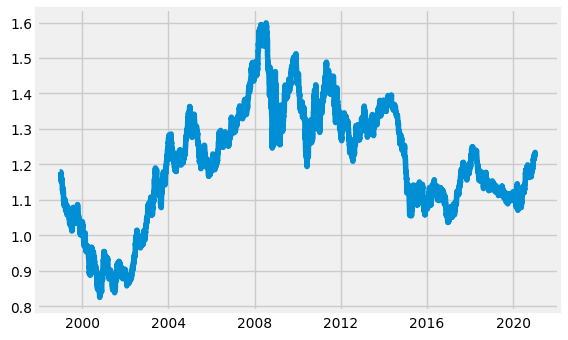

In [225]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.show()

In [226]:
euro_to_dollar["rolling_mean_7"] = (euro_to_dollar["US_dollar"]
                                     .rolling(7)
                                     .mean()
                                    )
euro_to_dollar["rolling_mean_30"] = (euro_to_dollar["US_dollar"]
                                     .rolling(30)
                                     .mean()
                                    )
euro_to_dollar["rolling_mean_50"] = (euro_to_dollar["US_dollar"]
                                     .rolling(50)
                                     .mean()
                                    )
euro_to_dollar["rolling_mean_100"] = (euro_to_dollar["US_dollar"]
                                     .rolling(100)
                                     .mean()
                                    )
euro_to_dollar["rolling_mean_365"] = (euro_to_dollar["US_dollar"]
                                     .rolling(365)
                                     .mean()
                                    )

In [227]:
euro_to_dollar

,Time,US_dollar,rolling_mean_7,rolling_mean_30,rolling_mean_50,rolling_mean_100,rolling_mean_365
0,1999-01-04,1.1789,NaN,NaN,NaN,NaN,NaN
1,1999-01-05,1.1790,NaN,NaN,NaN,NaN,NaN
2,1999-01-06,1.1743,NaN,NaN,NaN,NaN,NaN
3,1999-01-07,1.1632,NaN,NaN,NaN,NaN,NaN
4,1999-01-08,1.1659,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
5694,2021-01-04,1.2296,1.224071,1.211170,1.198524,1.189348,1.132095
5695,2021-01-05,1.2271,1.225571,1.212530,1.199354,1.189806,1.132433
5696,2021-01-06,1.2338,1.227643,1.213987,1.200392,1.190291,1.132771
5697,2021-01-07,1.2276,1.228457,1.215357,1.201280,1.190661,1.133070


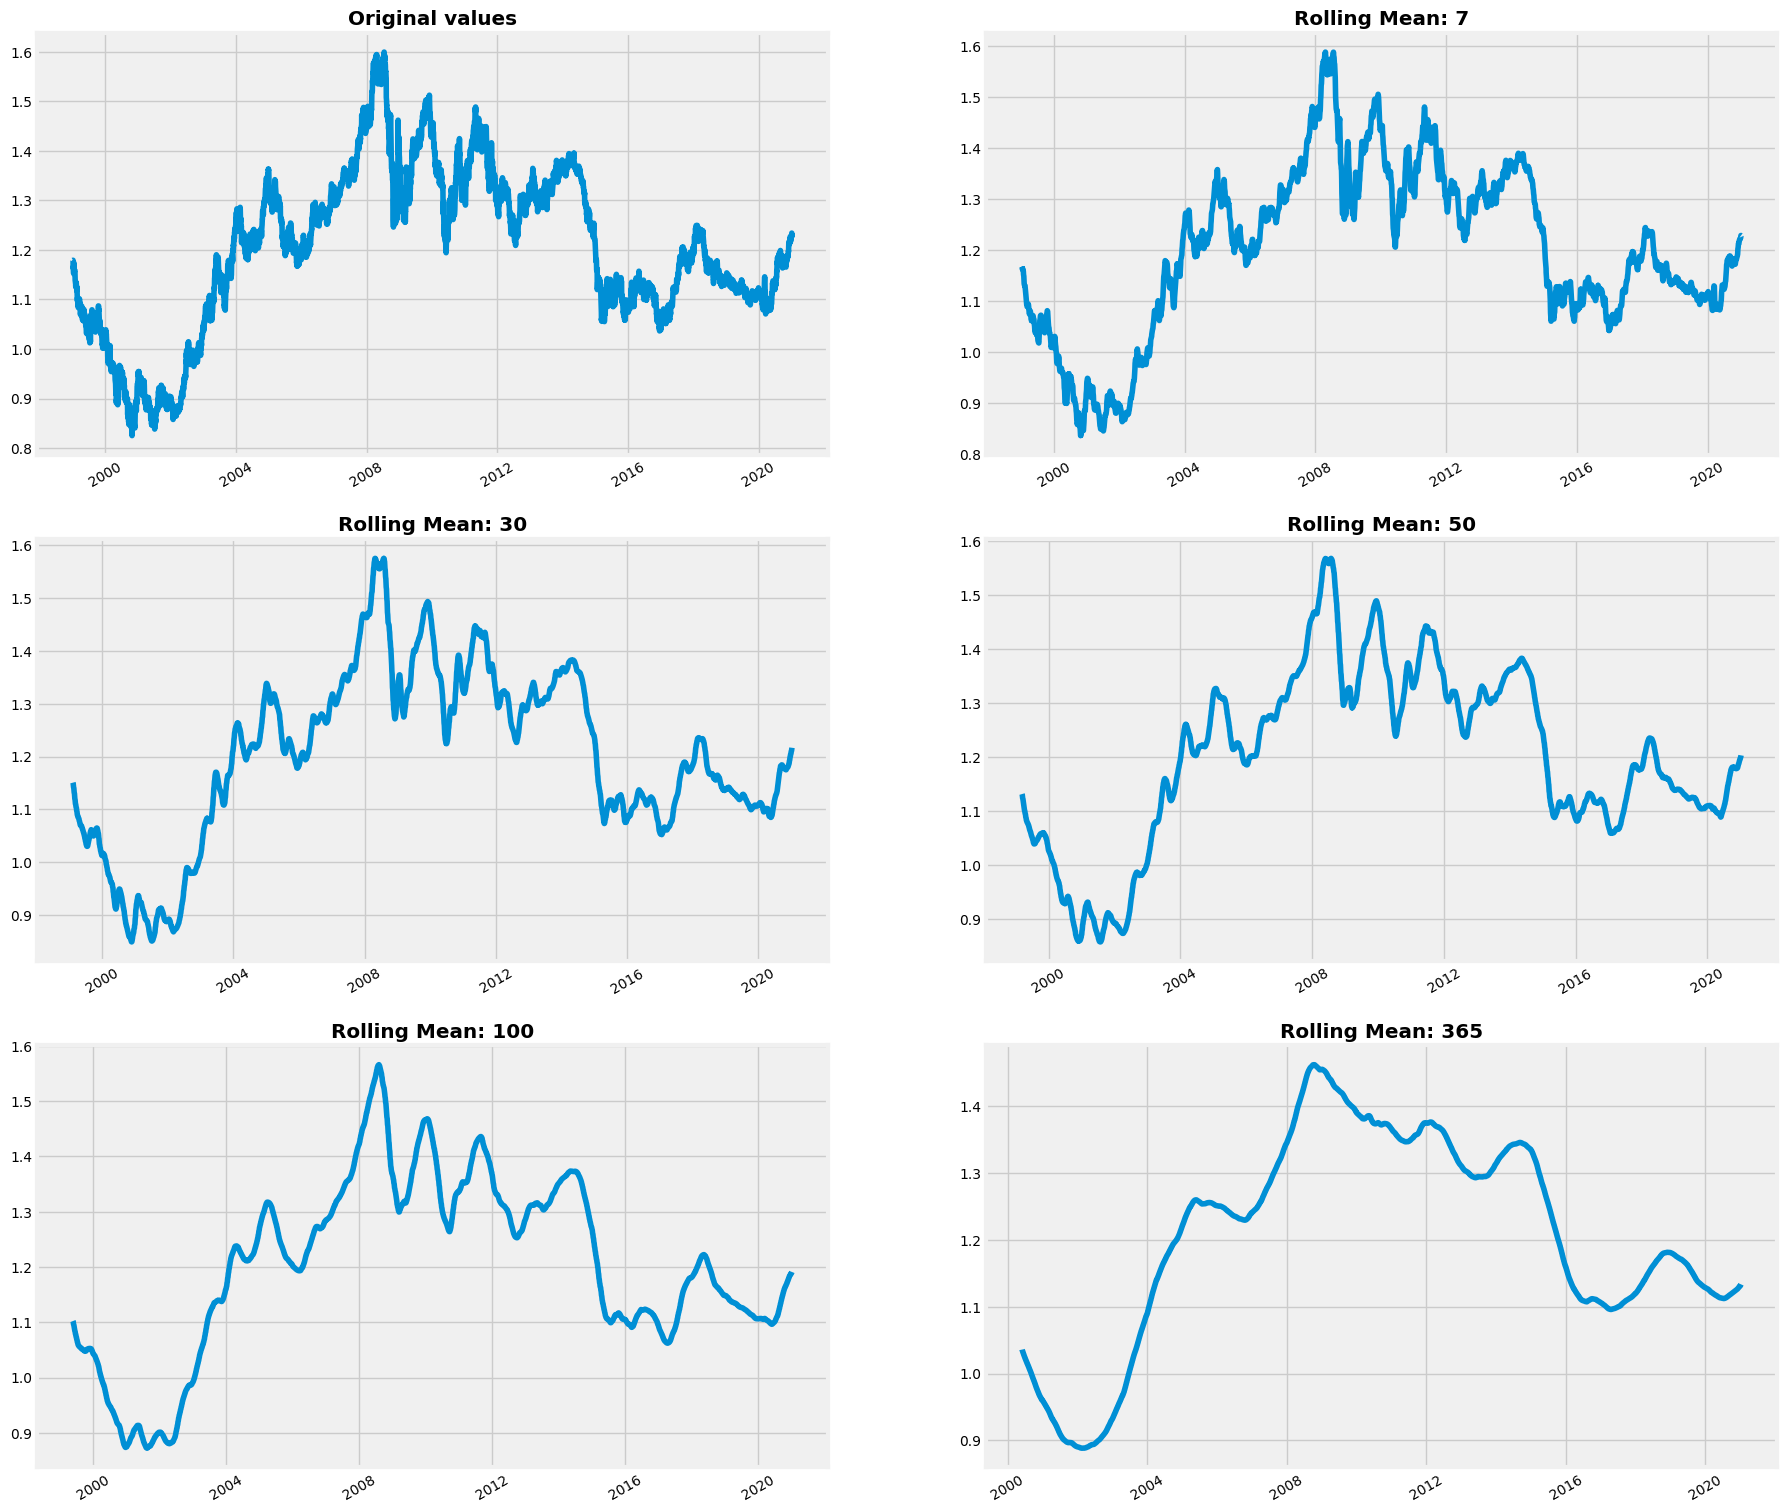

In [228]:
plt.figure(figsize=(20, 19))
plt.subplot(3, 2, 1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.xticks(rotation=30)
plt.title("Original values", weight="bold")

for i,j in zip(range(2, 7), [7, 30, 50, 100, 365]):
    plt.subplot(3, 2, i)
    plt.plot(euro_to_dollar['Time'], euro_to_dollar['rolling_mean_' + str(j)])
    plt.xticks(rotation=30)
    plt.title("Rolling Mean: " + str(j), weight="bold")

plt.show()

### We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.

In [229]:
overall = euro_to_dollar[euro_to_dollar["Time"].dt.year.between(2016, 2020)]
covid = euro_to_dollar[euro_to_dollar["Time"].dt.year >= 2020]


In [230]:
overall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1279 entries, 4415 to 5693
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Time              1279 non-null   datetime64[ns]
 1   US_dollar         1279 non-null   float64       
 2   rolling_mean_7    1279 non-null   float64       
 3   rolling_mean_30   1279 non-null   float64       
 4   rolling_mean_50   1279 non-null   float64       
 5   rolling_mean_100  1279 non-null   float64       
 6   rolling_mean_365  1279 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 79.9 KB


In [231]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 5437 to 5698
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Time              262 non-null    datetime64[ns]
 1   US_dollar         262 non-null    float64       
 2   rolling_mean_7    262 non-null    float64       
 3   rolling_mean_30   262 non-null    float64       
 4   rolling_mean_50   262 non-null    float64       
 5   rolling_mean_100  262 non-null    float64       
 6   rolling_mean_365  262 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 16.4 KB


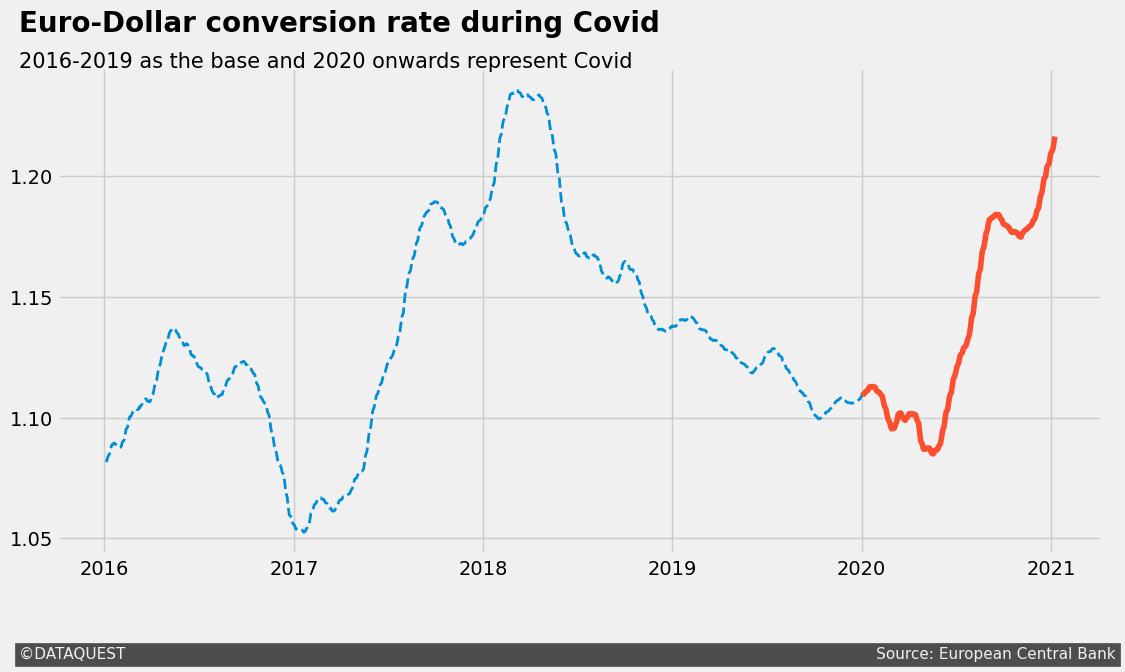

In [232]:
def plot_covid_graph():
    style.use('fivethirtyeight')
    plt.figure(figsize = (12, 6))
    ax = plt.subplot(1, 1, 1)
    ax.plot(
        overall["Time"], overall["rolling_mean_30"], 
        linewidth=2, linestyle='dashed')

    ax.plot(
        covid["Time"], covid["rolling_mean_30"], 
        linewidth=4, linestyle='solid')

    ax.set_yticks([1.050, 1.100, 1.150, 1.200])
    ax.text(735800, 1.26, 'Euro-Dollar conversion rate during Covid', size=20, weight="bold")
    ax.text(735800, 1.245, '2016-2019 as the base and 2020 onwards represent Covid', size=15)

    ax.text(735800.0, 1.00, '©DATAQUEST' + ' '*154 + 'Source: European Central Bank',
            color = '#f0f0f0', backgroundcolor = '#4d4d4d',
            size=11)

    plt.show()
    
plot_covid_graph()

### We show how the euro-dollar rate changed during the 2007-2008 financial crisis. We can also show the data for 2006 and 2009 for comparison. We can use a line plot.

In [233]:
overall = euro_to_dollar[euro_to_dollar["Time"].dt.year.between(2006, 2009)]
financial_crisis = euro_to_dollar[euro_to_dollar["Time"].dt.year.between(2007, 2008)]


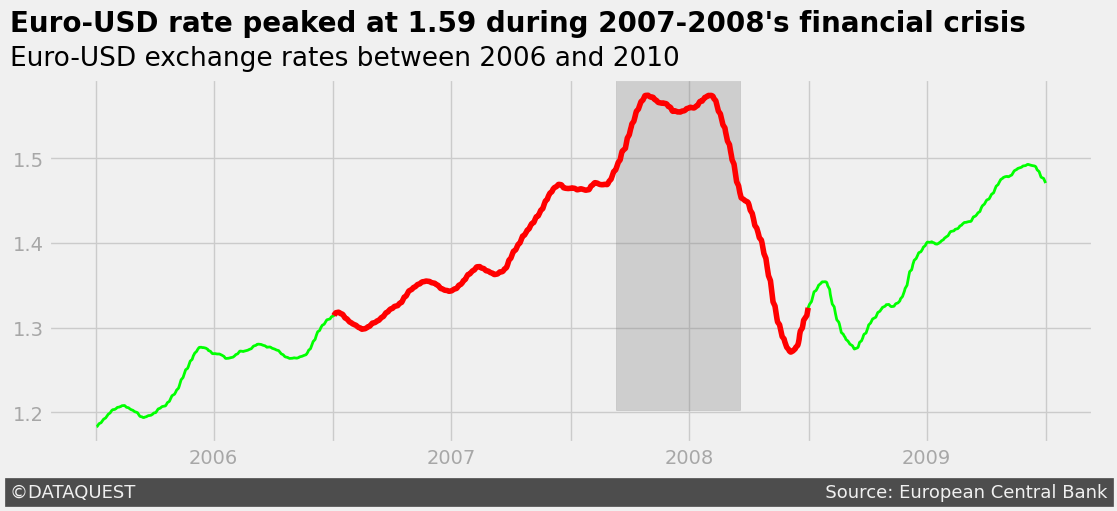

In [234]:
def plot_financial_crisis():
    style.use('fivethirtyeight')
    plt.figure(figsize = (12, 4.5))
    ax = plt.subplot(1, 1, 1)
    ax.plot(
        overall["Time"], overall["rolling_mean_30"], 
        linewidth=2, linestyle='solid', color="#00FF00")

    ax.plot(
        financial_crisis["Time"], financial_crisis["rolling_mean_30"], 
        linewidth=4, linestyle='solid', color = "red")
    
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_yticks([1.2, 1.3, 1.4, 1.5])
    
    ax.text(732180, 1.65, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis" , size=20, weight="bold")
    ax.text(732180, 1.61, 'Euro-USD exchange rates between 2006 and 2010', size=19)

    ax.text(732180.0, 1.10, '©DATAQUEST' + ' '*120 + 'Source: European Central Bank',
            color = '#f0f0f0', backgroundcolor = '#4d4d4d',
            size=13)
    
    ax.axvspan(xmin=733112.0, xmax=733302.0, ymin=0.09,
           alpha=0.3, color='grey')

    ax.set_xticklabels(['', '2006', '', '2007', '', '2008', '', '2009', '', '2010'], alpha=0.3)
    ax.set_yticklabels(['1.2', '1.3', '1.4', '1.5'], alpha=0.3)

    plt.show()
    
plot_financial_crisis()

### We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot.

In [235]:
overall = euro_to_dollar
bush = euro_to_dollar[euro_to_dollar["Time"].dt.year.between(2001, 2008)]
obama = euro_to_dollar[euro_to_dollar["Time"].dt.year.between(2009, 2016)]
trump = euro_to_dollar[euro_to_dollar["Time"].dt.year.between(2017, 2021)]

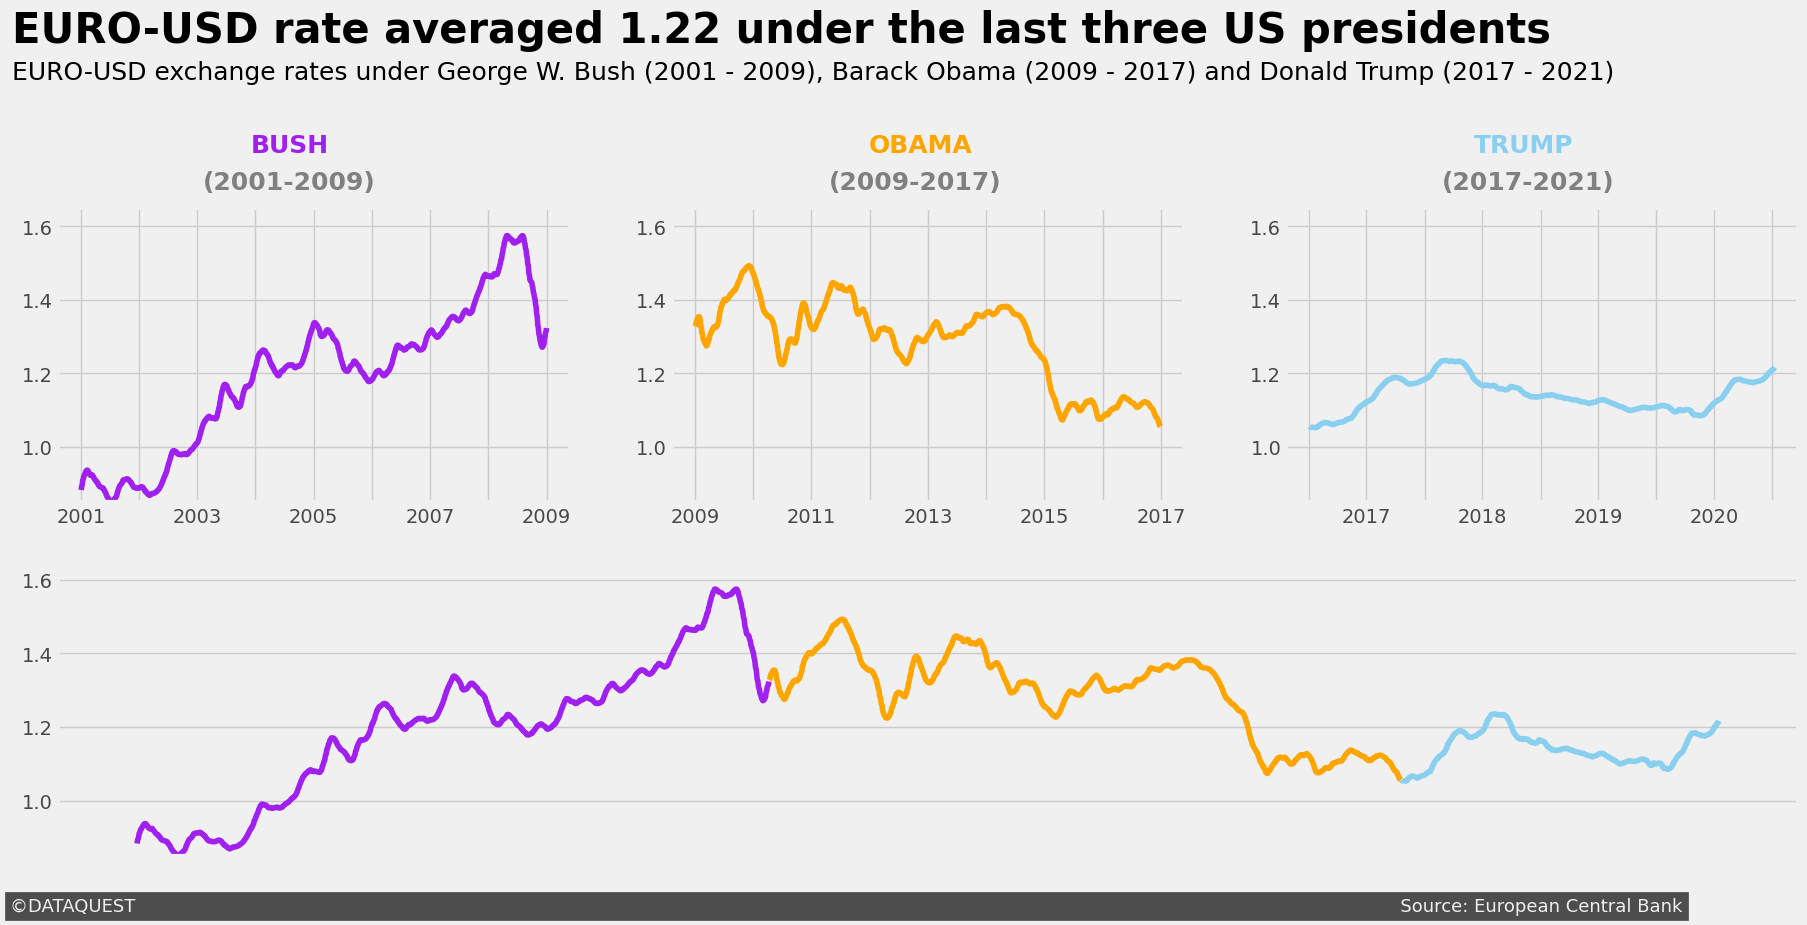

In [253]:
style.use('fivethirtyeight')
plt.figure(figsize = (20, 8))

ax1 = plt.subplot(2, 3, 1)
ax2 = plt.subplot(2, 3, 2)
ax3 = plt.subplot(2, 3, 3)

ax4 = plt.subplot(2, 1, 2)

ax1.plot(bush["Time"], bush["rolling_mean_30"], color = "#A020F0")
ax1.set_ylim(0.85, 1.65)
ax1.set_yticklabels(['', '1.0', '1.2', '1.4', '1.6'], alpha=0.7)
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '',
                     '2007', '', '2009'],alpha=0.7)
ax1.text(731550.0, 1.8, "BUSH", color='#A020F0', weight="bold", size=18)
ax1.text(731250.0, 1.70, "(2001-2009)", color='gray', weight="bold", size=18)

# title
ax1.text(730050.0, 2.1, 
         "EURO-USD rate averaged 1.22 under the last three US presidents", 
         weight="bold", size=30)
ax1.text(730050.0, 2.0, 
         "EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009 - 2017) and Donald Trump (2017 - 2021)", 
         size=18)

ax2.plot(obama["Time"], obama["rolling_mean_30"], color = "#FFA500")
ax2.set_ylim(0.85, 1.65)
ax2.set_yticklabels(['', '1.0', '1.2', '1.4', '1.6'], alpha=0.7)
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '',
                     '2015', '', '2017'],alpha=0.7)
ax2.text(734500.0, 1.8, "OBAMA", color='#FFA500', weight="bold", size=18)
ax2.text(734250.0, 1.70, "(2009-2017)", color='gray', weight="bold", size=18)


ax3.plot(trump["Time"], trump["rolling_mean_30"], color = "#89CFF0")
ax3.set_yticklabels(['', '1.0', '1.2', '1.4', '1.6'], alpha=0.7)
ax3.set_ylim(0.85, 1.65)
ax3.set_xticklabels(['', '2017', '', '2018', '', '2019', '',
                     '2020', '', '2021'],alpha=0.7)
ax3.text(736850.0, 1.8, "TRUMP", color='#89CFF0', weight="bold", size=18)
ax3.text(736750.0, 1.70, "(2017-2021)", color='gray', weight="bold", size=18)

ax4.plot(bush["Time"], bush["rolling_mean_30"], color = "#A020F0")
ax4.plot(obama["Time"], obama["rolling_mean_30"], color = "#FFA500")
ax4.plot(trump["Time"], trump["rolling_mean_30"], color = "#89CFF0")
ax4.set_yticklabels(['', '1.0', '1.2', '1.4', '1.6'], alpha=0.7)
ax4.set_ylim(0.85, 1.65)
ax4.set_xticks([])
ax4.text(729900.0, 0.7, '©DATAQUEST' + ' '*220 + 'Source: European Central Bank',
            color = '#f0f0f0', backgroundcolor = '#4d4d4d',
            size=13)

plt.show()